# Assignment 7: Linear Model Selection and Regularization

Dataset(s) needed:
Kaggle House Prices (https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

## Learning Objectives
- Produce a model with l2 regularization, with a statistically significant improvement over a model without regularization.
- Produce a model with l1 regularization, with a statistically significant improvement over a model without regularization.
- Produce a model with both l1 and l2 regularization terms, with a statistically significant improvement over a model without regularization.
- Produce a logistic regression model with a statistically significant improvement over the null model (a model without input - variables).
- Produce a generalized additive model with a statistically significant improvement over the null model (a model without input variables).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

data = pd.read_csv('House Prices.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [3]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


 Question 1.1: Drop the Id column as it is not needed for prediction

In [4]:
data.drop(['Id'], axis=1, inplace=True)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


 Question 1.2: Visualize a scatter plot of 'GrLivArea' in the x-axis and 'SalePrice' in the y-axis. Can you spot any outliers?

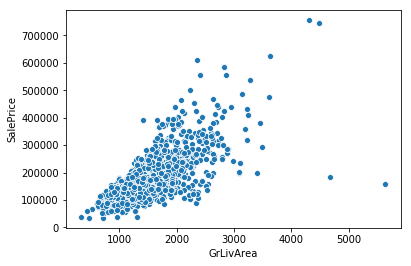

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=data, x="GrLivArea", y="SalePrice")

 Question 1.3: Removing outliers in the data for all GrLivArea greater than 4000 then check the scatter plot again

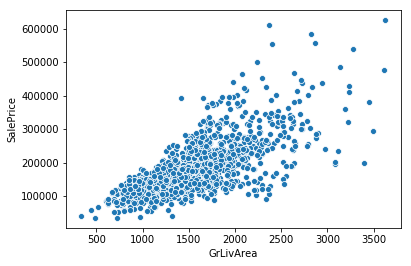

In [6]:
# Remove outliers for data['GrLivArea']>4000
liv_area_greater_than_4000 = data[(data['GrLivArea'] > 4000)].index
# Dropping the outliers
data.drop(liv_area_greater_than_4000 , inplace=True)
#To Do Create a scatter plot
sns.scatterplot(data=data, x="GrLivArea", y="SalePrice")

Quesiont 2.1: Convert categorical variable into dummy variables using pandas get_dummies API


In [7]:
# Find all categorical columns
# Source: https://stackoverflow.com/questions/29803093/check-which-columns-in-dataframe-are-categorical
cols = data.columns # 80
num_cols = data._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))
print(len(cat_cols))
cat_cols

43


['Street',
 'LotConfig',
 'Utilities',
 'GarageCond',
 'MiscFeature',
 'BsmtFinType1',
 'FireplaceQu',
 'BsmtQual',
 'ExterCond',
 'Exterior2nd',
 'LandSlope',
 'HouseStyle',
 'Alley',
 'RoofStyle',
 'Heating',
 'BsmtCond',
 'BsmtExposure',
 'BldgType',
 'Fence',
 'Functional',
 'Neighborhood',
 'Exterior1st',
 'LandContour',
 'ExterQual',
 'HeatingQC',
 'MSZoning',
 'BsmtFinType2',
 'Electrical',
 'RoofMatl',
 'SaleCondition',
 'CentralAir',
 'Condition2',
 'Condition1',
 'KitchenQual',
 'PavedDrive',
 'PoolQC',
 'SaleType',
 'MasVnrType',
 'GarageFinish',
 'LotShape',
 'GarageQual',
 'GarageType',
 'Foundation']

In [8]:
# Test for unique values in any columns
data['LandSlope'].unique()
data['LandContour'].unique()

array(['Lvl', 'Bnk', 'Low', 'HLS'], dtype=object)

In [9]:
# Convert categorical features into dummy variables
data = pd.get_dummies(data, columns=cat_cols)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Columns: 288 entries, MSSubClass to Foundation_Wood
dtypes: float64(3), int64(34), uint8(251)
memory usage: 789.1 KB


In [10]:
print(len(data.columns))
data.head()

288


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,0,0,1,0,0,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,0,1,0,0,0,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,0,0,1,0,0,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,0,0,1,0,0,0


Question 2.2: Impute missing data by the median of each column.

In [11]:
# Find all columns with null values
res = data.isnull().sum()
res[res > 0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [12]:
data["LotFrontage"].fillna(data["LotFrontage"].median(), inplace=True)
data["MasVnrArea"].fillna(data["MasVnrArea"].median(), inplace=True)
data["GarageYrBlt"].fillna(data["GarageYrBlt"].median(), inplace=True)

Question 2.2b: Make sure that there are no null values remaining

In [13]:
res = data.isnull().sum()
res[res > 0]

Series([], dtype: int64)

In [14]:
# data[data.eq("?").any(1)].head()
# data[data.eq("!").any(1)].head()

Question 2.3: Generate train test split 70/30. Set random_state=42

In [15]:
from sklearn.model_selection import train_test_split

X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Question 3.1: Train a linear regression algorithm to predict `SalePrice` from the remaining features.

In [16]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV, LinearRegression, ElasticNetCV
from sklearn.metrics import mean_squared_error

#Fit a linear regression model to this data
model_1 = LinearRegression().fit(X_train, y_train)

Question 3.2: Evaluate the model and report the performance on both training and test data. These numbers will serve as our benchmark performance.

In [17]:
#Compute the RMSE
m1_tr_y_pred = model_1.predict(X_train)
m1_ts_y_pred = model_1.predict(X_test)
m1_train_mse = mean_squared_error(y_train, m1_tr_y_pred)
m1_test_mse = mean_squared_error(y_test, m1_ts_y_pred)
print("Train MSE:", m1_train_mse, "Test MSE:", m1_test_mse)

Train MSE: 328972320.18979824 Test MSE: 559710152.4718368


We now train a regularized version of `LinearRegression` called `Lasso` (you can load it from the same library). `Lasso` has an argument called `alpha`, which is the **shrinkage parameter** we referred to earlier.

Question 4.1: Let `alpha = 0.000001` and train a `Lasso` algorithm. Show that the resulting model is practically identical to the one we trained with `LinearRegression`. There are different ways to show this, so you will need to think of a way. <span style="color:red" float:right>[2 point]</span>

In [18]:
from sklearn import linear_model

model_2 = linear_model.Lasso(alpha=0.000001).fit(X_train, y_train)
#Compute the RMSE 
m2_tr_y_pred = model_2.predict(X_train)
m2_ts_y_pred = model_2.predict(X_test)
m2_train_mse = mean_squared_error(y_train, m2_tr_y_pred)
m2_test_mse = mean_squared_error(y_test, m2_ts_y_pred)
print("Train MSE:", m2_train_mse, "Test MSE:", m2_test_mse)

Train MSE: 328972595.7779522 Test MSE: 588077053.0006969


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167611535132.67618, tolerance: 634515517.391386
  positive)


In [19]:
from sklearn.metrics import r2_score

n = data.shape[0]
p = len(data.columns)

m1_r2 = r2_score(y_test, m1_ts_y_pred)
m1_adj_r2 = 1-(1-m1_r2)*(n-1)/(n-p-1)

m2_r2 = r2_score(y_test, m2_ts_y_pred)
m2_adj_r2 = 1-(1-m2_r2)*(n-1)/(n-p-1)

print("Adjusted R2 for simple Linear Regression:", m1_adj_r2)
print("Adjusted R2 for Lasso:", m2_adj_r2)

Adjusted R2 for simple Linear Regression: 0.8609440053415711
Adjusted R2 for Lasso: 0.8538964512620231


In [20]:
# Source: https://stackoverflow.com/questions/58965317/implementing-aic-score-for-multiple-linear-regression-manually
def logLikelihood(y_true, y_pred):
     residuals = (y_true-y_pred)
     ll = -(n * 1/2) * (1 + np.log(2 * np.pi)) - (n / 2) * np.log(residuals.dot(residuals) / n)
     return ll

def AIC_BIC(y_true, y_pred):
    ll = logLikelihood(y_true, y_pred)
    k = p

    AIC = (-2 * ll) + (2 * k)
    BIC = (-2 * ll) + (k * np.log(n))

    return AIC, BIC

In [21]:
m1_AIC, m1_BIC = AIC_BIC(y_test, m1_ts_y_pred)
m2_AIC, m2_BIC = AIC_BIC(y_test, m2_ts_y_pred)
print("AIC, BIC for simple Linear Regression:", m1_AIC, m1_BIC)
print("AIC, BIC for Lasso:", m2_AIC, m2_BIC)

AIC, BIC for simple Linear Regression: 32283.73665051977 33805.36974040168
AIC, BIC for Lasso: 32355.719713624174 33877.35280350608


Lasso and Linear Regression seem similar because of similar AIC, BIC and adjusted R2 scores but the test MSEs aren't similar. Plotting comparison of co-efficients below.

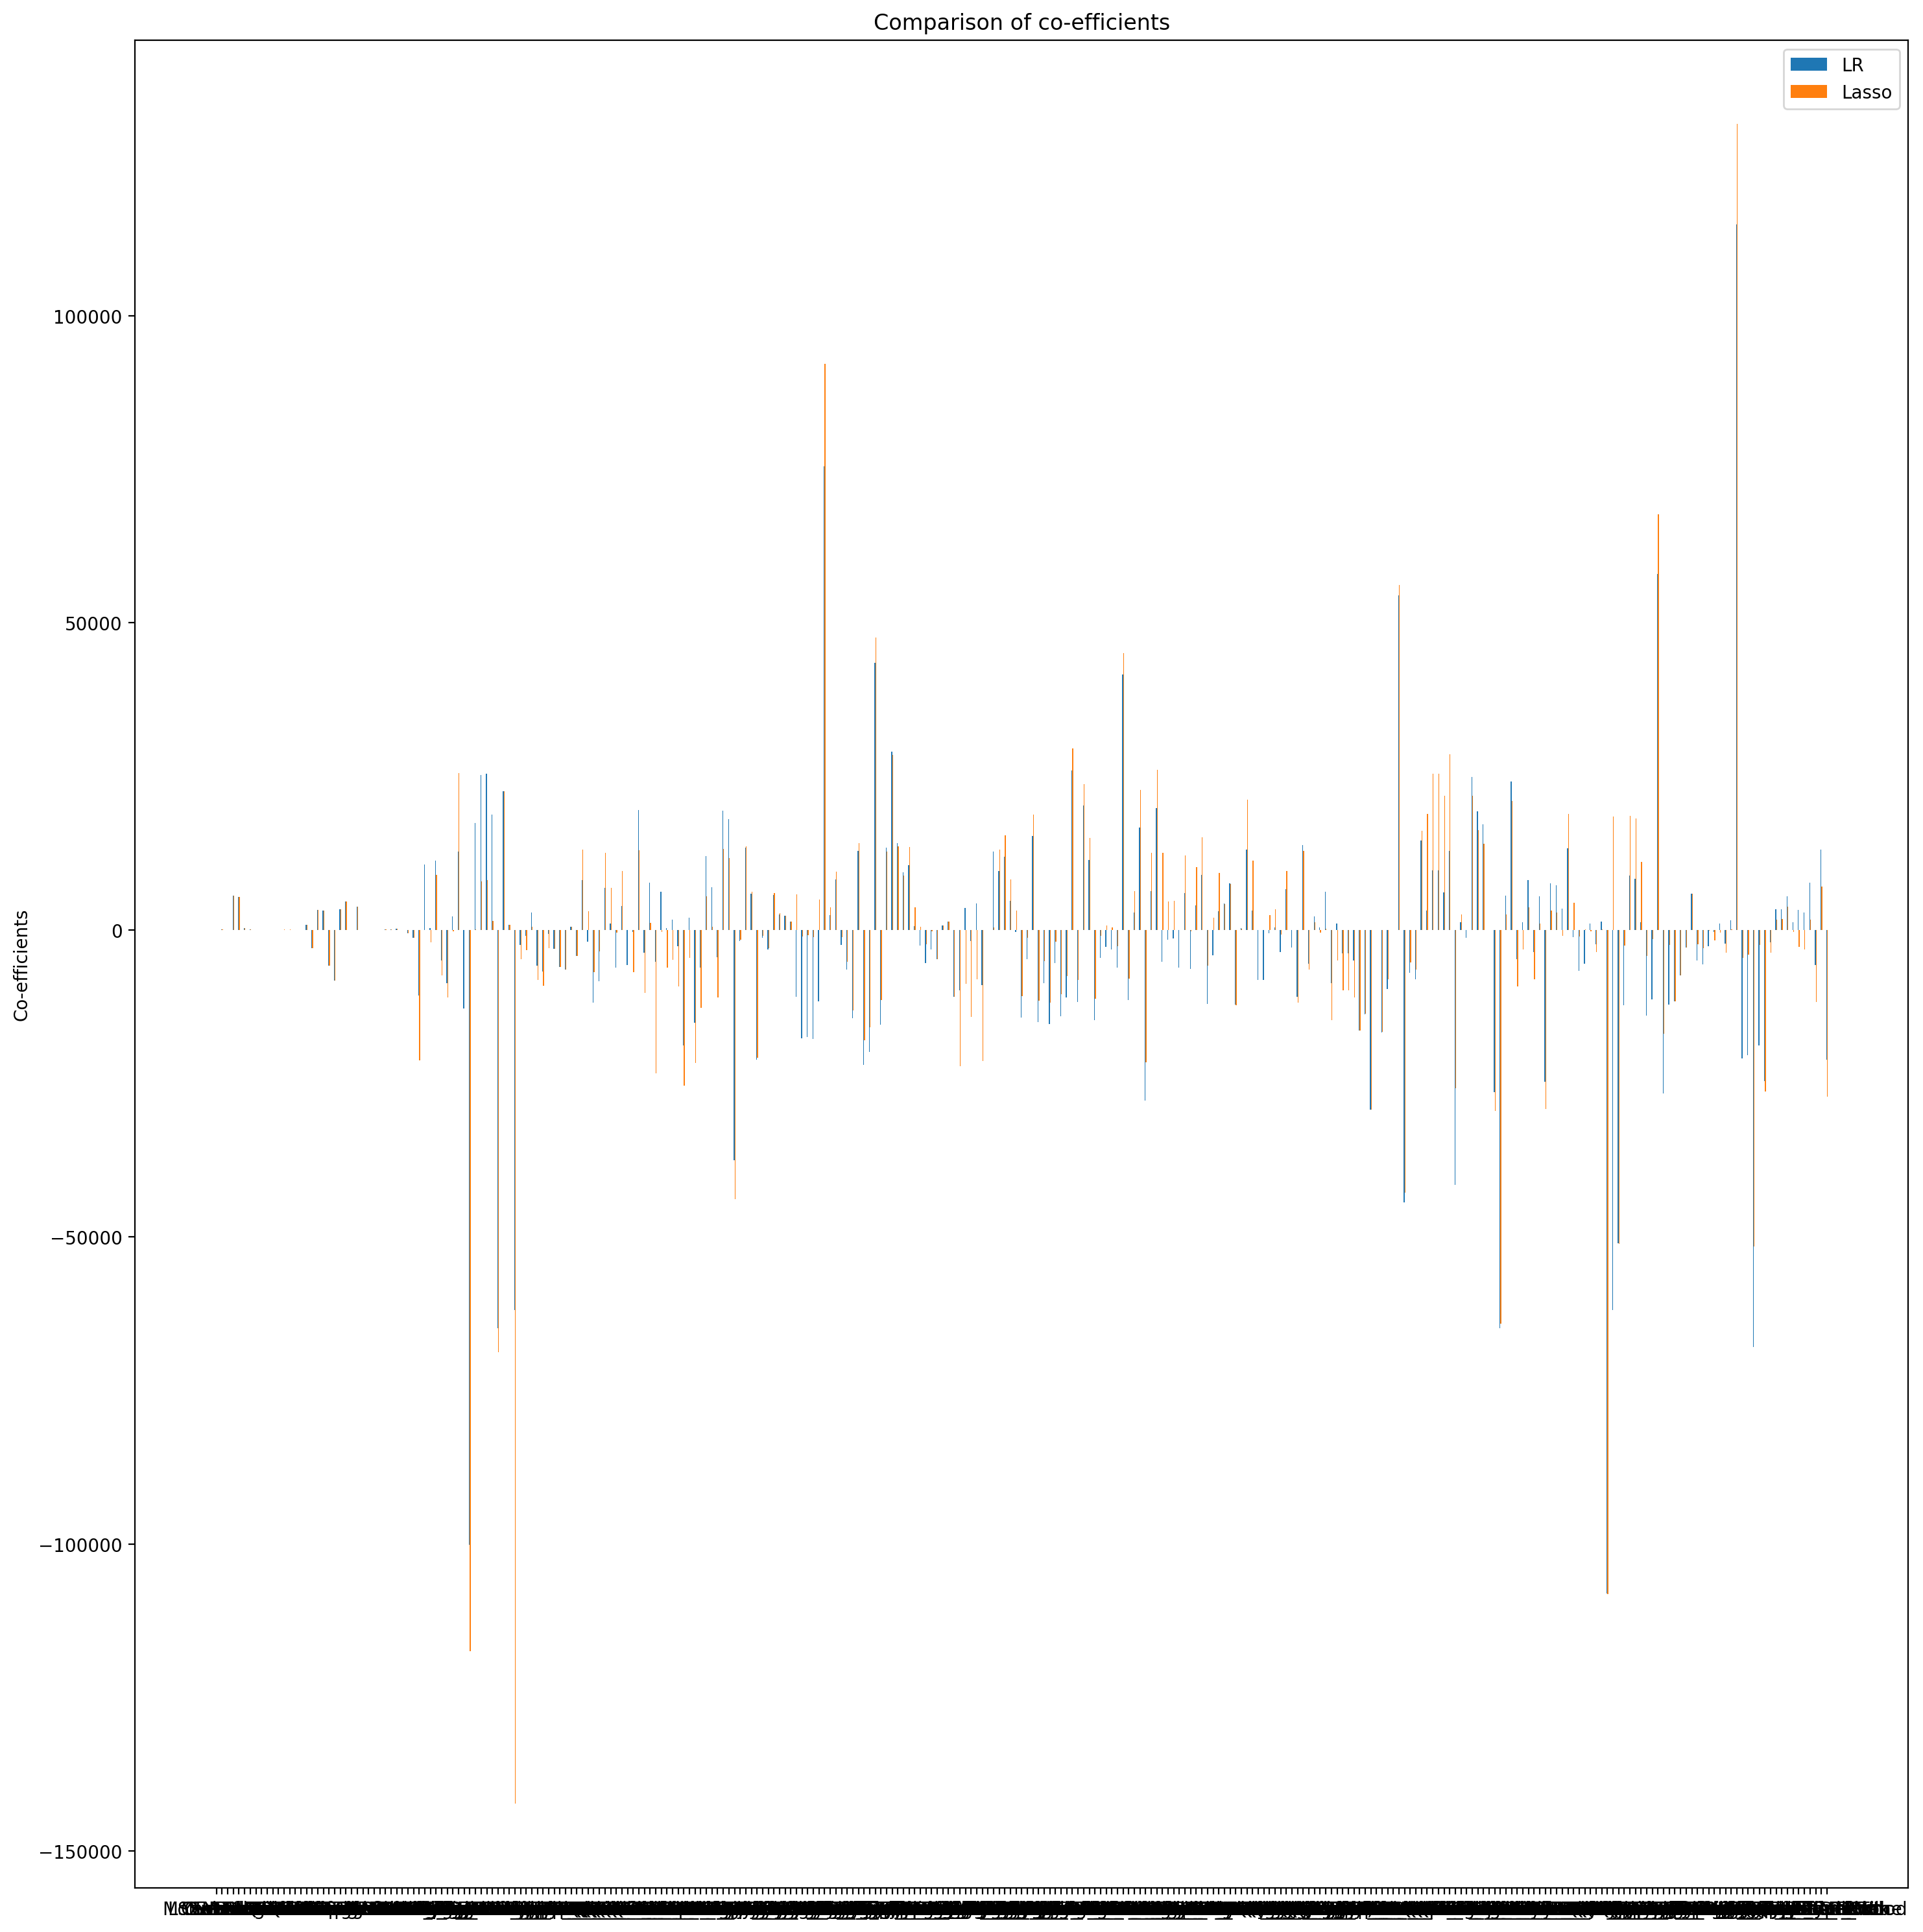

In [22]:
# Compare performance
plt.rcParams['figure.figsize'] = [15, 15]
plt.rcParams['figure.dpi'] = 200

cols = X.columns

x = np.arange(len(cols))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, model_1.coef_, width, label='LR')
rects2 = ax.bar(x + width/2, model_2.coef_, width, label='Lasso')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Co-efficients')
ax.set_title('Comparison of co-efficients')
ax.set_xticks(x)
ax.set_xticklabels(cols)
ax.legend()

fig.tight_layout()

plt.show()

Question 4.2: Iteratively train a new `Lasso` model, letting `alpha` change each time to one of the values given by `alpha_vals` below, keeping track of the performance on the training and test data each time, and storing the model's coefficients each time (the `coef_` attribute of the trained model)

In [23]:
alpha_vals = np.arange(0.01, 5, .01) # values of alpha we want to iterate over
coefficients = []
train_mses = []
test_mses = []

for i in alpha_vals:
    model = linear_model.Lasso(alpha=i).fit(X_train, y_train)
    coefficients.append(model.coef_)
    tr_y_pred = model.predict(X_train)
    ts_y_pred = model.predict(X_test)
    tr_mse = mean_squared_error(y_train, tr_y_pred)
    train_mses.append(tr_mse)
    ts_mse = mean_squared_error(y_test, ts_y_pred)
    test_mses.append(ts_mse)
#     print("Lasso with alpha:", i, "Train MSE:", tr_mse, "Test MSE:", ts_mse)

# pd.DataFrame({'linreg': linreg.coef_, 'lasso': clf.coef_}).head(10)

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167559134194.67352, tolerance: 634515517.391386
  positive)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167562604378.86865, tolerance: 634515517.391386
  positive)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167531712697.93982, tolerance: 634515517.391386
  positive)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167504731826.632

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 168228919712.39093, tolerance: 634515517.391386
  positive)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167791158011.00665, tolerance: 634515517.391386
  positive)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 164295016670.34857, tolerance: 634515517.391386
  positive)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 164895170277.856

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 165061129318.8845, tolerance: 634515517.391386
  positive)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167030741473.2793, tolerance: 634515517.391386
  positive)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167498871178.165, tolerance: 634515517.391386
  positive)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 161679366562.81842, 

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 168015944365.79947, tolerance: 634515517.391386
  positive)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 168020718042.5145, tolerance: 634515517.391386
  positive)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 168024507673.66928, tolerance: 634515517.391386
  positive)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 168027390765.6270

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167428884681.12018, tolerance: 634515517.391386
  positive)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167471728287.99136, tolerance: 634515517.391386
  positive)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167509874174.56418, tolerance: 634515517.391386
  positive)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167544684069.803

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167146782007.0283, tolerance: 634515517.391386
  positive)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167130058485.8181, tolerance: 634515517.391386
  positive)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167114182977.93143, tolerance: 634515517.391386
  positive)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167098977028.70102

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 164351542448.29797, tolerance: 634515517.391386
  positive)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 164271504782.6239, tolerance: 634515517.391386
  positive)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 164195449561.50027, tolerance: 634515517.391386
  positive)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 164122662594.7474

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 161705085808.5541, tolerance: 634515517.391386
  positive)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 161675225006.24823, tolerance: 634515517.391386
  positive)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 161646277371.77298, tolerance: 634515517.391386
  positive)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 161618144540.3865

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 160164199200.51013, tolerance: 634515517.391386
  positive)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 160162918611.20532, tolerance: 634515517.391386
  positive)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 160136910128.47012, tolerance: 634515517.391386
  positive)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 160109150179.833

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 159250343619.97897, tolerance: 634515517.391386
  positive)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 161202342771.4269, tolerance: 634515517.391386
  positive)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 160717711932.65048, tolerance: 634515517.391386
  positive)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 160471011648.4028

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 158414541314.9437, tolerance: 634515517.391386
  positive)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 158368523454.22488, tolerance: 634515517.391386
  positive)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 158232362556.27005, tolerance: 634515517.391386
  positive)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 158190561213.2555

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 157003225279.5038, tolerance: 634515517.391386
  positive)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 156949125475.01178, tolerance: 634515517.391386
  positive)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 156895133052.25842, tolerance: 634515517.391386
  positive)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 156841162337.2153

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 155501922098.88913, tolerance: 634515517.391386
  positive)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 155433042277.18845, tolerance: 634515517.391386
  positive)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 155365513681.5535, tolerance: 634515517.391386
  positive)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 155296959747.4831

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 153381830039.15564, tolerance: 634515517.391386
  positive)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 153319023457.0612, tolerance: 634515517.391386
  positive)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 153327087943.80527, tolerance: 634515517.391386
  positive)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 153204963809.9881

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 157201433140.62396, tolerance: 634515517.391386
  positive)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 157088237347.12775, tolerance: 634515517.391386
  positive)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 156965755552.88715, tolerance: 634515517.391386
  positive)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 156857376481.326

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 155507702283.41202, tolerance: 634515517.391386
  positive)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 155467655946.3582, tolerance: 634515517.391386
  positive)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 155427013884.6739, tolerance: 634515517.391386
  positive)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 155385349528.7545,

Question 4.3: Using a visual, show how the performance on the training and test data changed as we gradually increased `alpha`.

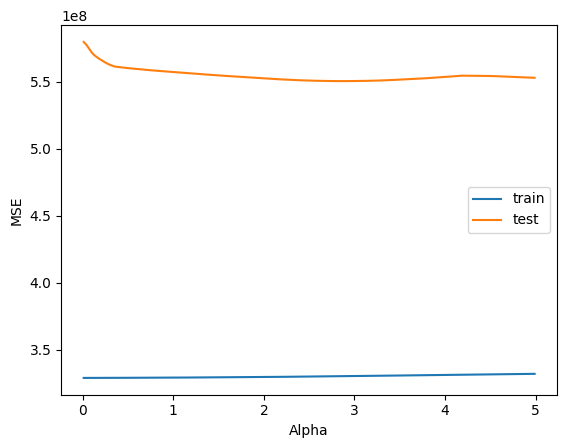

In [24]:
plt.rcdefaults()
plot_lasso_mse = sns.lineplot(x=alpha_vals, y=train_mses, label='train')
plot_lasso_mse = sns.lineplot(x=alpha_vals, y=test_mses, label='test')
plot_lasso_mse.set(xlabel='Alpha', ylabel='MSE')
plt.show()

Question 4.4: Using a visual, show how the model's coefficients changed as we gradually increased the shrinkage parameter `alpha`. HINT: They should appear to be shrinking toward zero as you increase `alpha`!

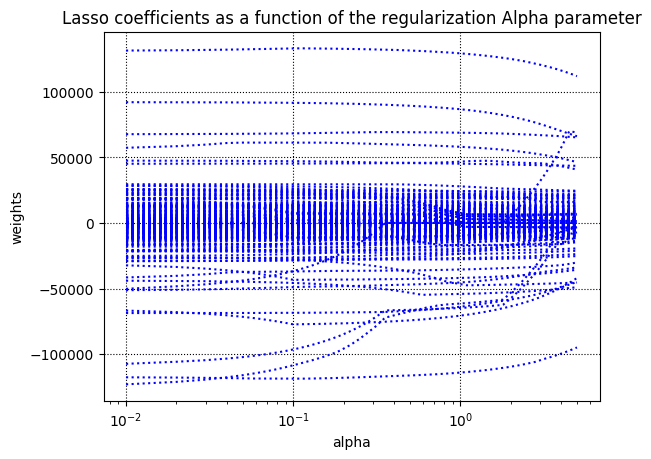

<Figure size 640x480 with 0 Axes>

In [25]:
# Source: https://www.kaggle.com/code/jeromeblanchet/ridge-lasso-coefficients-as-a-function-of-alpha
plt.rcdefaults()

# plt.figure(figsize=(40, 20))
# plt.subplot(121)
ax = plt.gca()
ax.plot(alpha_vals, coefficients, color='b', linestyle='dotted')
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization Alpha parameter')
plt.axis('tight')

plt.grid(color='black', linestyle='dotted')
plt.figure(constrained_layout=True)
plt.show()

Question 5.1: Repeat steps in Question 4 this time using `Ridge` instead of `Lasso`. We will use the following range for `alpha`: <span style="color:red" float:right>[2 point]

In [26]:
alpha_vals = np.arange(0.1, 200, 1)

In [27]:
# pd.DataFrame({'linreg': linreg.coef_, 'lasso': clf.coef_}).head(10)
coefficients = []
train_mses = []
test_mses = []

for i in alpha_vals:
    model = linear_model.Ridge(alpha=i).fit(X_train, y_train)
    coefficients.append(model.coef_)
    tr_y_pred = model.predict(X_train)
    ts_y_pred = model.predict(X_test)
    tr_mse = mean_squared_error(y_train, tr_y_pred)
    train_mses.append(tr_mse)
    ts_mse = mean_squared_error(y_test, ts_y_pred)
    test_mses.append(ts_mse)

Question 5.2: Using a visual, show how the performance on the training and test data changed as we gradually increased `alpha`.

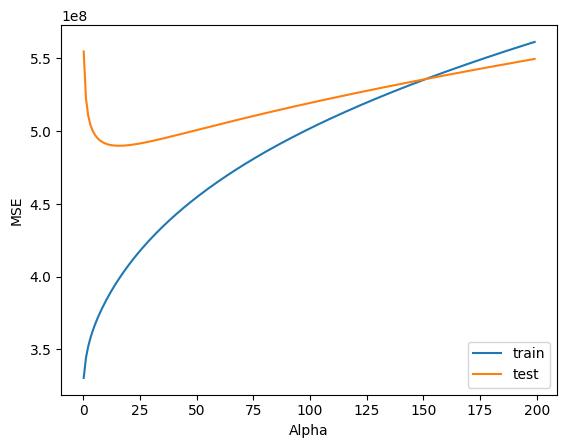

In [28]:
plt.rcdefaults()
plot_ridge_mse = sns.lineplot(x=alpha_vals, y=train_mses, label='train')
plot_ridge_mse = sns.lineplot(x=alpha_vals, y=test_mses, label='test')
plot_ridge_mse.set(xlabel='Alpha', ylabel='MSE')
plt.show()

Question 5.3: Using a visual, show how the model's coefficients changed as we gradually increased the shrinkage parameter `alpha`.

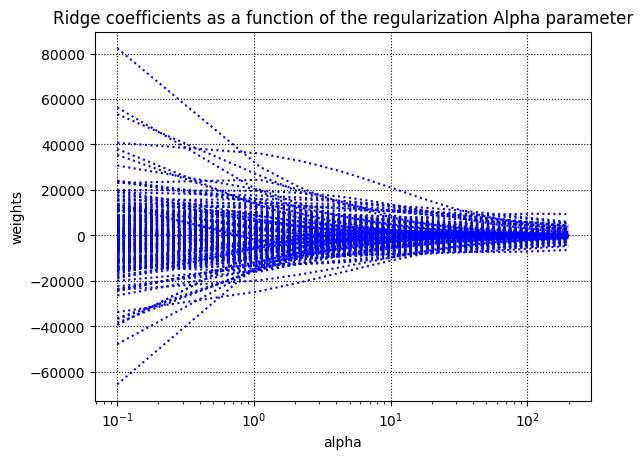

<Figure size 640x480 with 0 Axes>

In [29]:
plt.rcdefaults()

# plt.figure(figsize=(40, 20))
# plt.subplot(121)
ax = plt.gca()
ax.plot(alpha_vals, coefficients, color='b', linestyle='dotted')
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization Alpha parameter')
plt.axis('tight')

plt.grid(color='black', linestyle='dotted')
plt.figure(constrained_layout=True)
plt.show()

Question 6: Repeat questions 5.1 - 5.3 using elasticnet experimenting with differnet values of alpha

In [30]:
alpha_vals = np.arange(0.1, 30, 1)
coefficients = []
train_mses = []
test_mses = []

for i in alpha_vals:
    model = linear_model.ElasticNet(alpha=i).fit(X_train, y_train)
    coefficients.append(model.coef_)
    tr_y_pred = model.predict(X_train)
    ts_y_pred = model.predict(X_test)
    tr_mse = mean_squared_error(y_train, tr_y_pred)
    train_mses.append(tr_mse)
    ts_mse = mean_squared_error(y_test, ts_y_pred)
    test_mses.append(ts_mse)

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 266001431752.90424, tolerance: 634515517.391386
  positive)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 405358120481.5109, tolerance: 634515517.391386
  positive)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 449368523342.6807, tolerance: 634515517.391386
  positive)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 473296779266.855, 

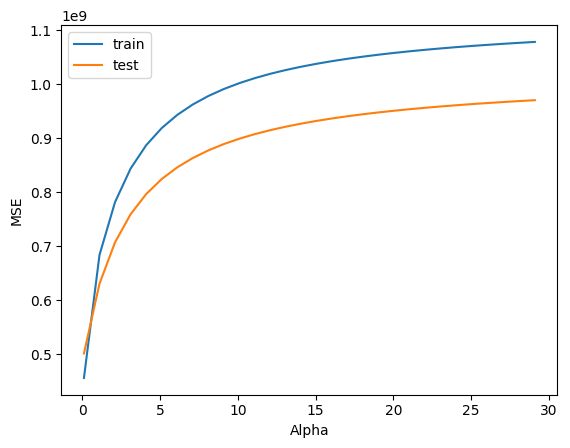

In [31]:
plt.rcdefaults()
plot_en_mse = sns.lineplot(x=alpha_vals, y=train_mses, label='train')
plot_en_mse = sns.lineplot(x=alpha_vals, y=test_mses, label='test')
plot_en_mse.set(xlabel='Alpha', ylabel='MSE')
plt.show()

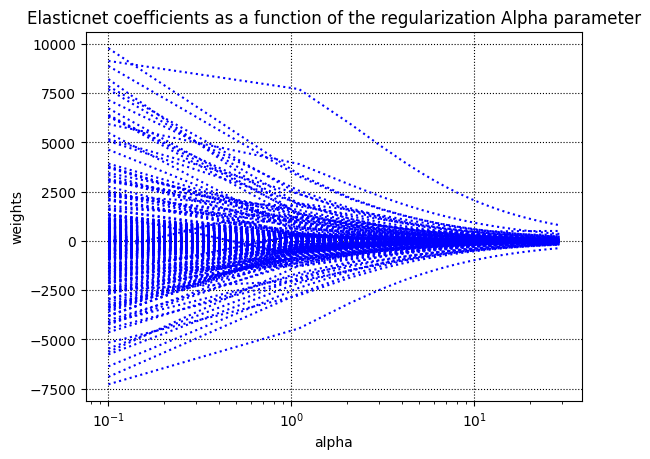

<Figure size 640x480 with 0 Axes>

In [32]:
plt.rcdefaults()

# plt.figure(figsize=(40, 20))
# plt.subplot(121)
ax = plt.gca()
ax.plot(alpha_vals, coefficients, color='b', linestyle='dotted')
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Elasticnet coefficients as a function of the regularization Alpha parameter')
plt.axis('tight')

plt.grid(color='black', linestyle='dotted')
plt.figure(constrained_layout=True)
plt.show()

Question 7: Based on the results, briefly describe the effect of changing `alpha` on the coefficients of both `Ridge`, `Lasso`, anf `ElasticNet`. What value of `alpha` would you choose for each case? You do not need to give a precise answer, but choose a number.

In terms of test MSE, Lasso, Elasticnet and Ridge have decreasing order of MSE and Ridge seems to be performing better. Ridge is also the only model that didn't throw convergence warning. 

In terms of test MSE versus alpha values, Lasso's seems to be reducing with increasing alpha whereas Ridge's is increasing with increse in alpha. Ridge's test MSE hits a minima before increasing and Elasticnet's is increasing with increase in alpha and shows signs of plateauing with larger alpha values.

Regarding co-efficients versus alpha graphs, for Elasticnet, since the test MSE is increasing and co-efficients are converging to zero at around alpha value 10, I would choose an alpha value less than 10. It looks like the first alpha value is the best value in terms of test MSE so maybe an alpha value lesser than 0.1 (the given  minimum alpha) will give better test MSE values. 

For Ridge, an alpha value somewhere between 0 and 2 would give us a good test MSE score since test MSE increases after alpha value ~15.

For Lasso, I would choose an alpha value greater than 5 maybe check till 20 like with Elasticnet since test MSE seems to be steadily descreasing with increase in alpha and co-efficients haven't converged yet. Lasso might perform better when compared to Ridge and Elasticnet at higher alpha values. 

Question 8: Create a new text cell in your Notebook: Complete a 50-100 word summary (or short description of your thinking in applying this week's learning to the solution) of your experience in this assignment. Include:

What was your incoming experience with this model, if any? what steps you took, what obstacles you encountered. how you link this exercise to real-world, machine learning problem-solving. (What steps were missing? What else do you need to learn?) This summary allows your instructor to know how you are doing and allot points for your effort in thinking and planning, and making connections to real-world work

Incoming experience: No incoming experience apart from previous assignments
Steps taken: This week's lesson was about feature selection with wrapper methods and shrinkage. Implemented all 3 shrinkage methods on the data set to get a deeper understanding of the concepts
Obstacles: This week's obstacle was mainly plotting the graphs in an easily understandable way. Tried to write my own code for co-efficients versus alpha graph but found simpler code to plot on Kaggle
Link to real world: I liked this assignment especially because with the different range of alpha values, I was able to see and learn for myself how different alpha values affects the test MSE and was able to get a feel of the balance in alpha that we should be looking for (not too high that most coefficients are near zero and not too small that coefficients are far away from zero)
Steps missing (with just this week's learning): Might be useful to compare Lasso, Ridge and Elasticnet with forward, backward and hybrid feature selectors.